In [1]:
from factor_analyser.FactorBacktester import FactorBacktester
from factor_analyser.FactorFactory import FactorFactory

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
f = pd.read_parquet("./data/factors/factor/1500/data.parq").pivot_table(index="date", columns="symbol", values="factor")
f.index = pd.to_datetime(f.index)

rets = pd.read_pickle("./data/forwad_rets.pkl")

In [3]:
f.head(5)

symbol,000001.SZ,000002.SZ,000004.SZ,000006.SZ,000007.SZ,000008.SZ,000011.SZ,000012.SZ,000014.SZ,000016.SZ,...,603609.SH,603636.SH,603688.SH,603699.SH,603766.SH,603806.SH,603889.SH,603988.SH,603993.SH,603998.SH
date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,0.245411,0.249183,0.299566,0.259969,0.286722,0.272459,0.325664,0.247740,0.302583,0.272721,...,0.254303,-0.305390,0.209438,0.347282,0.284753,0.295960,0.466061,0.276308,0.195917,0.313154
2015-01-06,0.199674,0.247432,0.237358,0.218728,0.299396,0.270573,0.263757,0.263452,0.252947,0.251338,...,0.311005,0.212467,0.261224,0.300589,0.282112,0.334007,0.374298,0.328737,0.225200,0.249233
2015-01-07,0.260156,0.244464,0.312507,0.290344,0.355295,0.280795,0.236996,0.291120,0.347950,0.270674,...,0.279508,0.421440,0.215804,0.111808,0.266558,0.264071,0.106740,0.273365,0.247711,0.289856
2015-01-08,0.232735,0.243114,0.249472,0.299578,0.246340,0.358845,0.251520,0.260275,0.297528,0.244733,...,0.287800,0.257554,0.210676,0.308931,0.281378,0.285214,0.183594,0.327495,0.275588,0.278580
2015-01-09,0.213479,0.214714,0.286549,0.240772,0.251144,0.254860,0.234473,0.291791,0.290842,0.299898,...,0.288997,0.341876,0.230655,0.263665,0.300232,0.300396,0.215055,0.313759,0.289590,0.235341


# Demo of FactorBacktester Usage

In [4]:
mng = FactorBacktester(f, rets, forward_time=0, annualization=250)

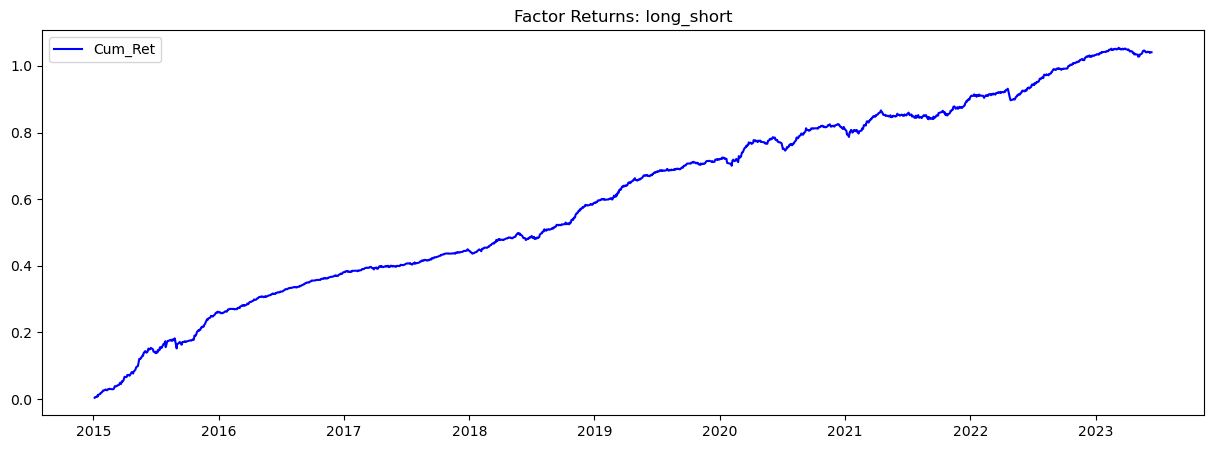

+---------------+-------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+
|               | Mean  | Volatility | Sharpe Ratio | Skewness | Excess Kurtosis | VaR (0.05) | CVaR (0.05) |  Min   |  Max  | Max Drawdown |   Peak   |  Bottom  | Recovery |
+---------------+-------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+
| factor_return | 0.127 |   0.033    |    3.821     |  -0.544  |      7.677      |   -0.003   |   -0.004    | -0.018 | 0.012 |    -0.039    | 20200604 | 20200710 | 20200818 |
+---------------+-------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+


2015-01-05    0.003832
2015-01-06    0.000360
2015-01-07    0.002157
2015-01-08    0.000020
2015-01-09   -0.000423
                ...   
2023-06-07   -0.000625
2023-06-08   -0.001976
2023-06-09    0.001756
2023-06-12    0.000210
2023-06-13    0.000000
Length: 2054, dtype: float64

In [5]:
pnl = mng.get_factor_rets(method="long_short", plot=True, evaluation=True)
pnl

2015-01-05    0.044451
2015-01-06    0.010292
2015-01-07    0.093831
2015-01-08    0.030770
2015-01-09    0.004819
                ...   
2023-06-07   -0.047982
2023-06-08   -0.076507
2023-06-09    0.090916
2023-06-12    0.032830
2023-06-13         NaN
Length: 2054, dtype: float64

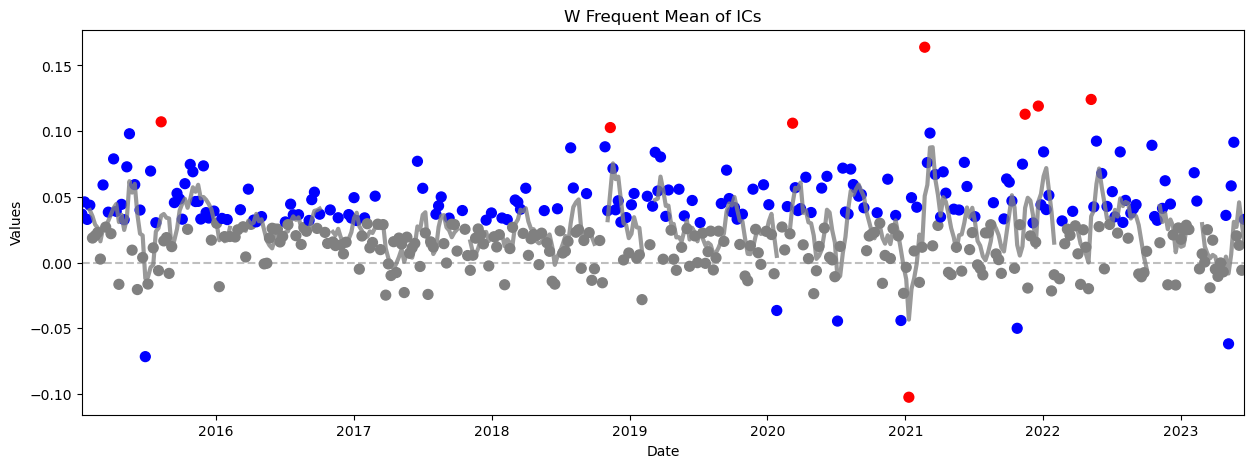

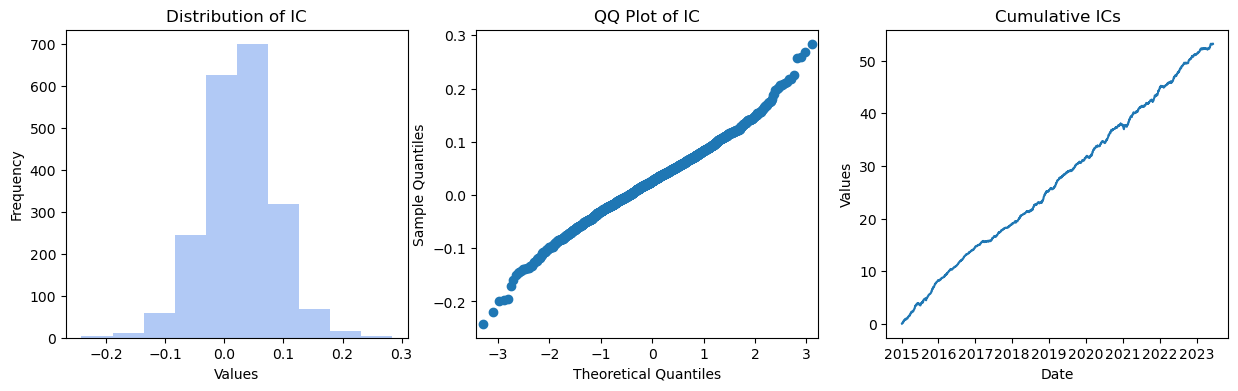

In [6]:
ic = mng.get_ic(plot=True)
ic

+----+--------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+
|    |  Mean  | Volatility | Sharpe Ratio | Skewness | Excess Kurtosis | VaR (0.05) | CVaR (0.05) |  Min   |  Max  | Max Drawdown |   Peak   |  Bottom  | Recovery |
+----+--------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+
| 1  | -0.169 |   0.304    |    -0.555    |  -0.827  |     13.191      |   -0.028   |   -0.051    | -0.140 | 0.185 |    -0.916    | 20150611 | 20230605 |   NaT    |
| 2  | -0.031 |   0.313    |    -0.100    |  -0.827  |     12.096      |   -0.028   |   -0.051    | -0.144 | 0.182 |    -0.769    | 20150611 | 20230524 |   NaT    |
| 3  | 0.023  |   0.315    |    0.073     |  -0.972  |     11.344      |   -0.029   |   -0.052    | -0.140 | 0.168 |    -0.684    | 20150611 | 20220425 |   NaT    |
| 4  | 0.0

,1,2,3,4,5,6,7,8,9,10
2015-01-05,0.015542,0.015149,0.023323,0.020375,0.020769,0.020921,0.022540,0.019589,0.023028,0.023318
2015-01-06,-0.000707,0.001107,0.001320,0.002440,-0.004440,0.000559,0.000616,0.000356,0.000964,0.000386
2015-01-07,-0.004328,-0.010136,-0.010052,-0.007126,-0.009647,-0.003142,-0.003894,-0.006506,0.000710,-0.000787
2015-01-08,-0.008592,-0.008268,-0.012640,-0.009948,-0.009235,-0.010480,-0.008852,-0.011028,-0.008738,-0.007578
2015-01-09,-0.011669,-0.010410,-0.007855,-0.013775,-0.009644,-0.010330,-0.010671,-0.014170,-0.007385,-0.011270
...,...,...,...,...,...,...,...,...,...,...
2023-06-07,-0.000474,0.000895,-0.000345,0.000354,-0.001487,-0.000706,-0.002885,-0.002857,-0.002125,0.000129
2023-06-08,0.005179,0.003068,0.003469,0.006109,0.002787,0.003414,0.002439,-0.001346,-0.000451,0.001137
2023-06-09,0.004178,0.000114,0.007274,0.005946,0.006255,0.005514,0.005689,0.007086,0.009362,0.007390
2023-06-12,0.003845,0.003911,0.006959,0.006576,0.002894,0.007224,0.004835,0.004292,0.005167,0.003745


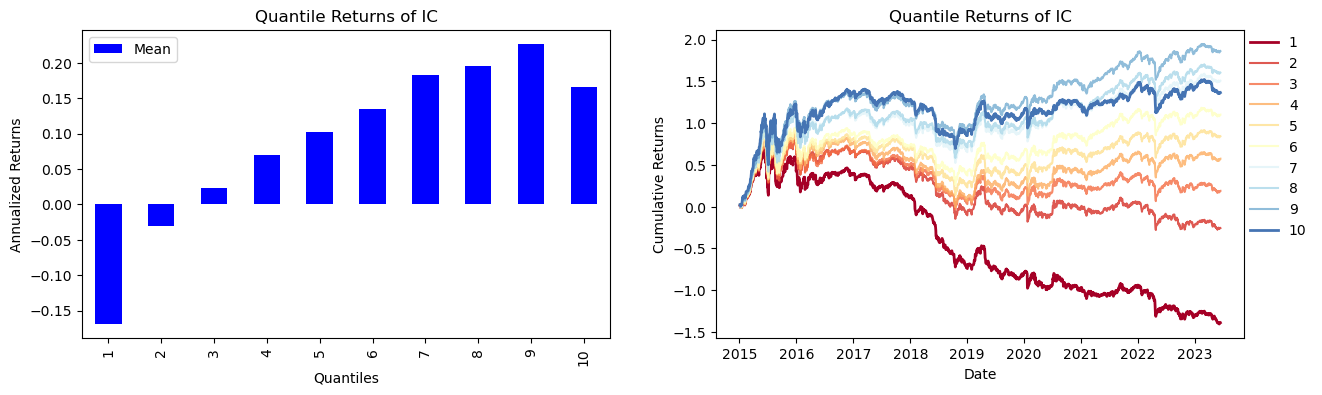

In [7]:
quantile_rets = mng.get_quantile_rets(quantiles=10,plot=True,evaluation=True)
quantile_rets

# Demo of FactorFactory Usage

In [8]:
ff = FactorFactory(rets, forward_time=0)

rank_ic: 0.0259, rank_ic_std: 0.0610, rank_ic_ir: 0.4247, null_percentage: 5.329614724790636
+----+--------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+
|    |  Mean  | Volatility | Sharpe Ratio | Skewness | Excess Kurtosis | VaR (0.05) | CVaR (0.05) |  Min   |  Max  | Max Drawdown |   Peak   |  Bottom  | Recovery |
+----+--------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+
| 1  | -0.170 |   0.305    |    -0.558    |  -0.827  |     13.191      |   -0.028   |   -0.051    | -0.140 | 0.185 |    -0.916    | 20150611 | 20230605 |   NaT    |
| 2  | -0.031 |   0.314    |    -0.100    |  -0.827  |     12.096      |   -0.028   |   -0.051    | -0.144 | 0.182 |    -0.769    | 20150611 | 20230524 |   NaT    |
| 3  | 0.023  |   0.317    |    0.073     |  -0.972  |     11.344      |   -0.029 

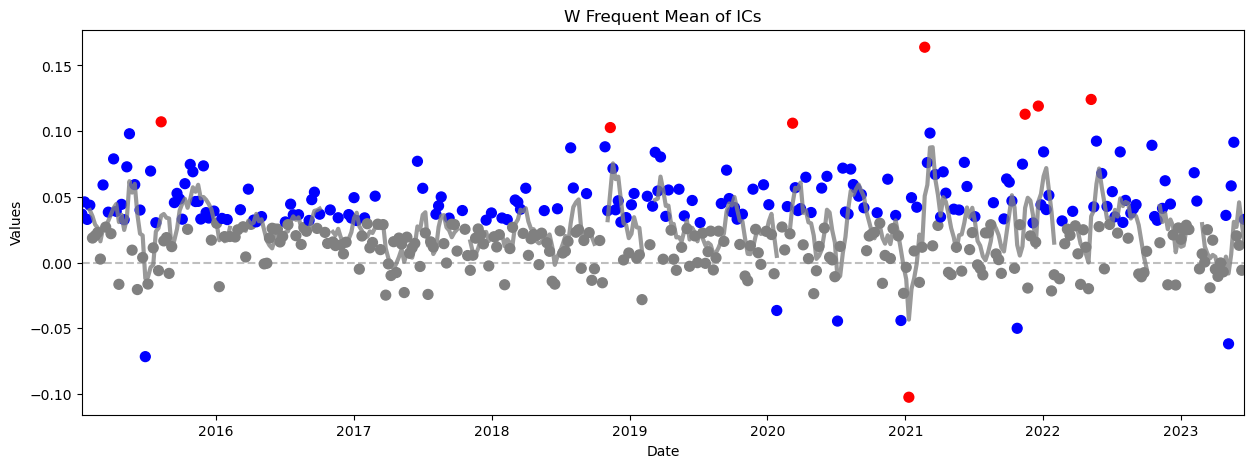

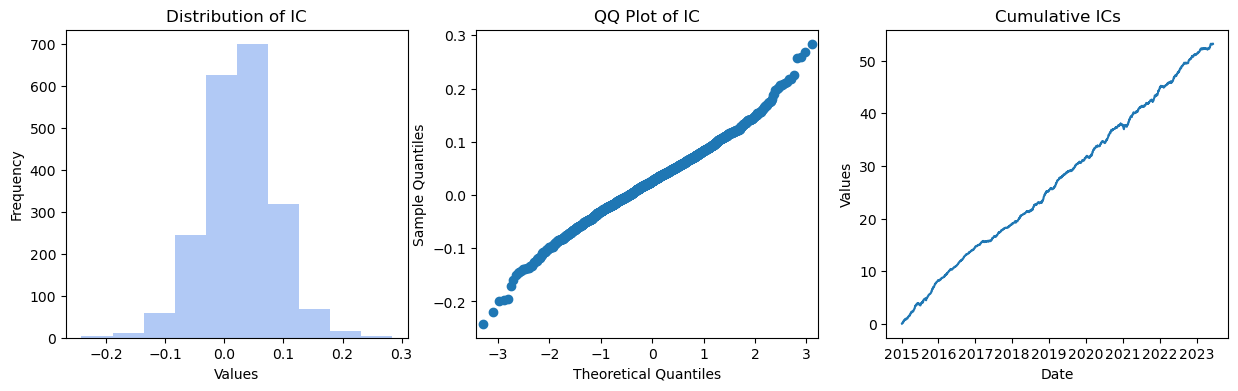

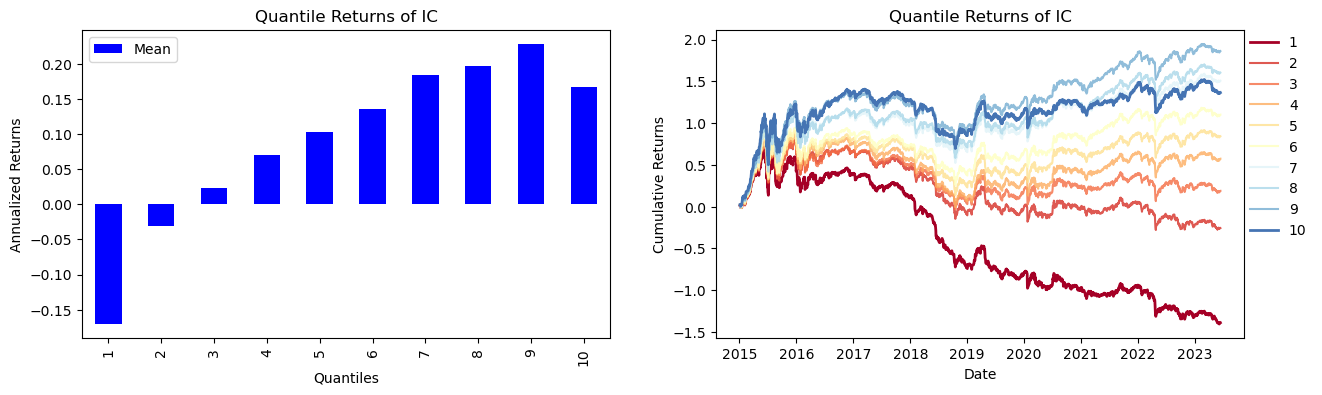

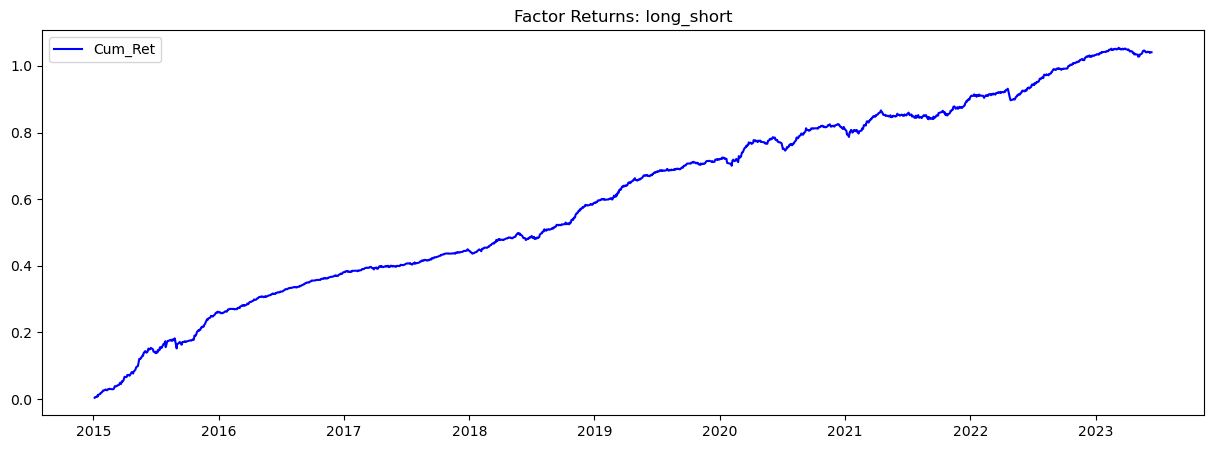

+---------------+-------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+
|               | Mean  | Volatility | Sharpe Ratio | Skewness | Excess Kurtosis | VaR (0.05) | CVaR (0.05) |  Min   |  Max  | Max Drawdown |   Peak   |  Bottom  | Recovery |
+---------------+-------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+
| factor_return | 0.128 |   0.033    |    3.836     |  -0.544  |      7.677      |   -0.003   |   -0.004    | -0.018 | 0.012 |    -0.039    | 20200604 | 20200710 | 20200818 |
+---------------+-------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+


In [9]:
ff.evaluate_factor(f,num_quantiles=10,factor_ret_method="long_short")

In [10]:
ic,ic_std,icir,null_pct = ff.evaluate_factor_icir(f,ic_thresh=0.02,icir_thresh=0.3,return_only=False)

In [11]:
ff.evaluate_factor_extension_stats(f,window = 10, min_periods= 2)

10Mean:
10RankMean:
10ExpMean:
10Std:
10Skew:
10Kurt:
10Median:
10Q25:
10Q75:


In [12]:
f2 = f.sub(f.mean(1),axis = 0)**2
ic,ic_std,icir,null_pct = ff.evaluate_factor_icir(f2,ic_thresh=0.02,icir_thresh=0.3,return_only=False)
ff.save_factor(f2,factor_name='f^2',time_point= '1500',root_path = "./data/factors/")
# f2 = ff.read_factor(factor_name='f^2',time_point= '1500',root_path = "./data/factors/")

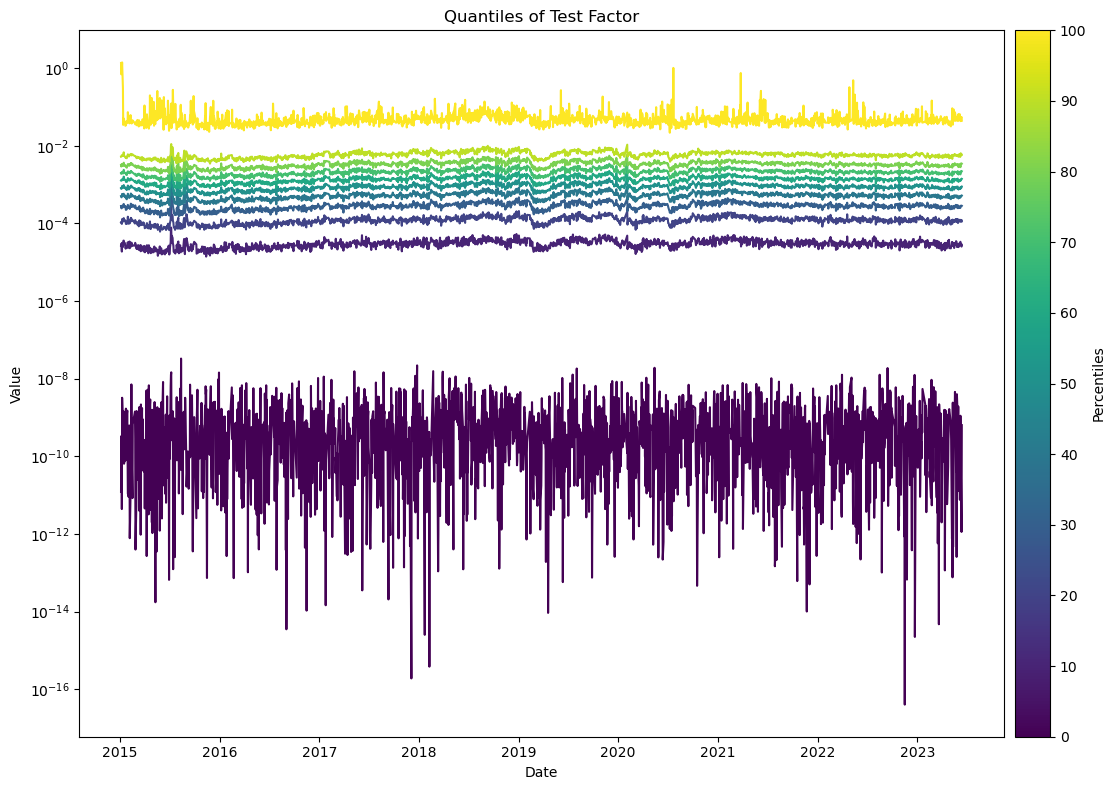

In [13]:
ff.plot_factor_quantiles(f2, log_scale=True)

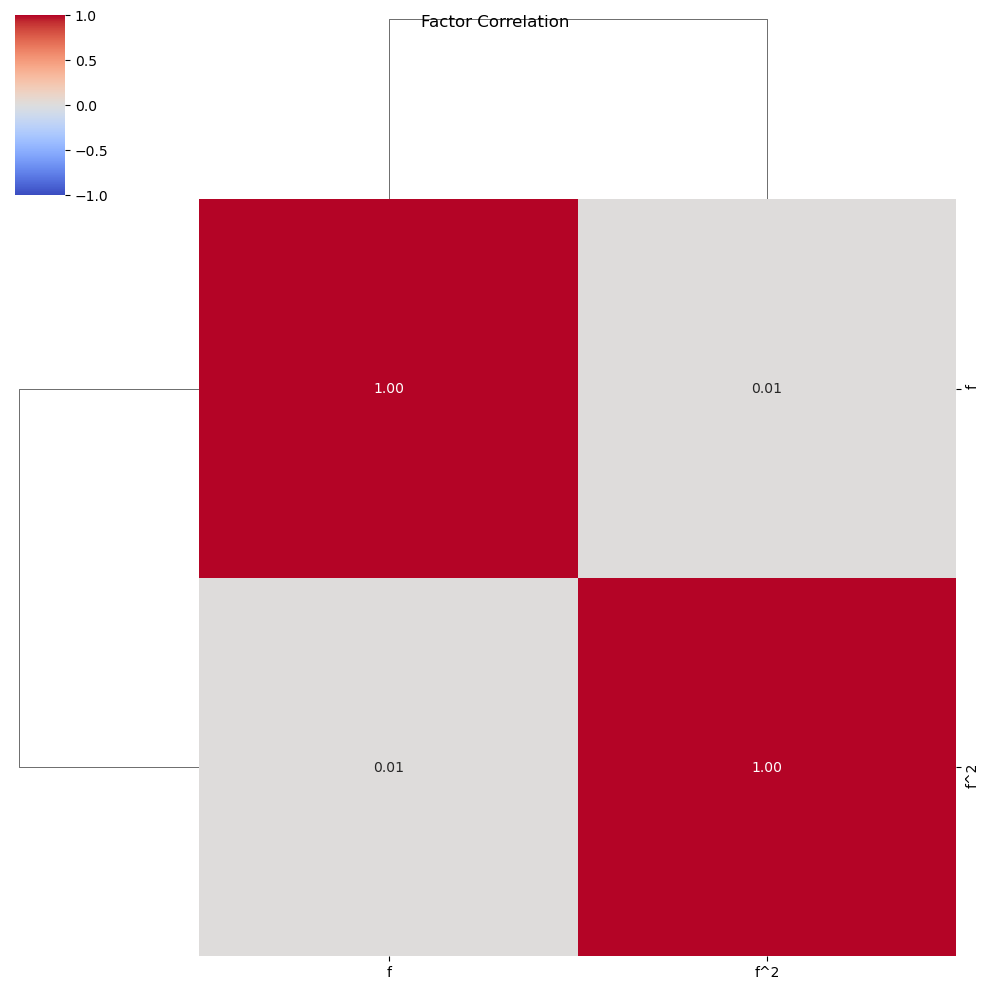

In [14]:
corr = ff.factor_correlation_analysis([f,f2],factor_names=['f','f^2'],plot_type='clustermap',figsize=(8,8))

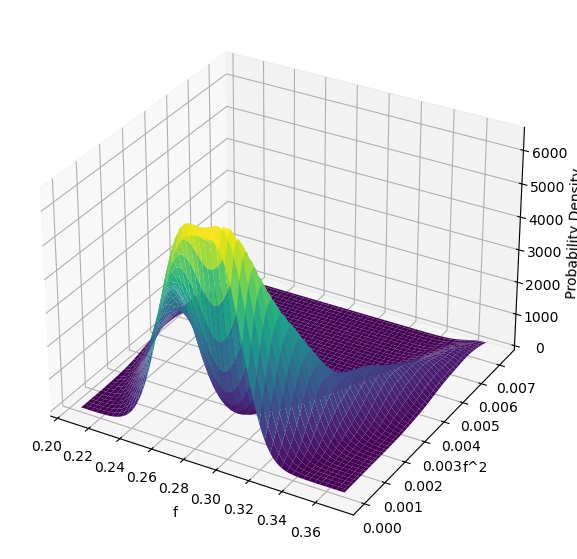

In [15]:
plot_date = '2021-06-30'
ff.plot_joint_pdf_with_outlier_removal(f.loc[plot_date],f2.loc[plot_date],name1='f',name2 = 'f^2',lower_bound=0.05,upper_bound=0.95)

rank_ic: 0.0259, rank_ic_std: 0.0610, rank_ic_ir: 0.4245, null_percentage: 5.329614724790636
+----+--------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+
|    |  Mean  | Volatility | Sharpe Ratio | Skewness | Excess Kurtosis | VaR (0.05) | CVaR (0.05) |  Min   |  Max  | Max Drawdown |   Peak   |  Bottom  | Recovery |
+----+--------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+
| 1  | -0.169 |   0.305    |    -0.552    |  -0.823  |     13.185      |   -0.028   |   -0.050    | -0.140 | 0.185 |    -0.915    | 20150611 | 20230605 |   NaT    |
| 2  | -0.032 |   0.314    |    -0.102    |  -0.829  |     12.103      |   -0.028   |   -0.051    | -0.144 | 0.182 |    -0.770    | 20150611 | 20230524 |   NaT    |
| 3  | 0.023  |   0.317    |    0.074     |  -0.975  |     11.325      |   -0.029 

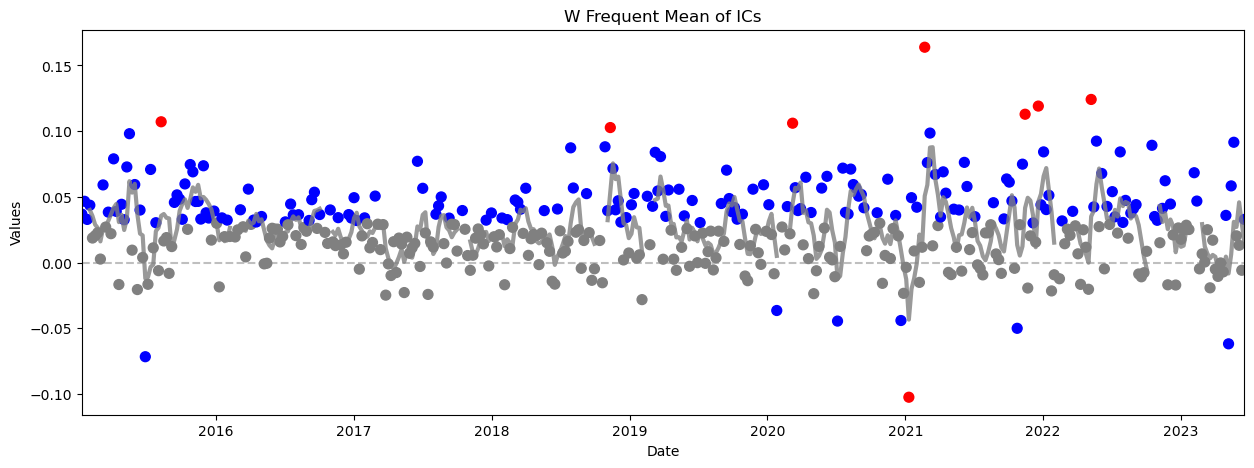

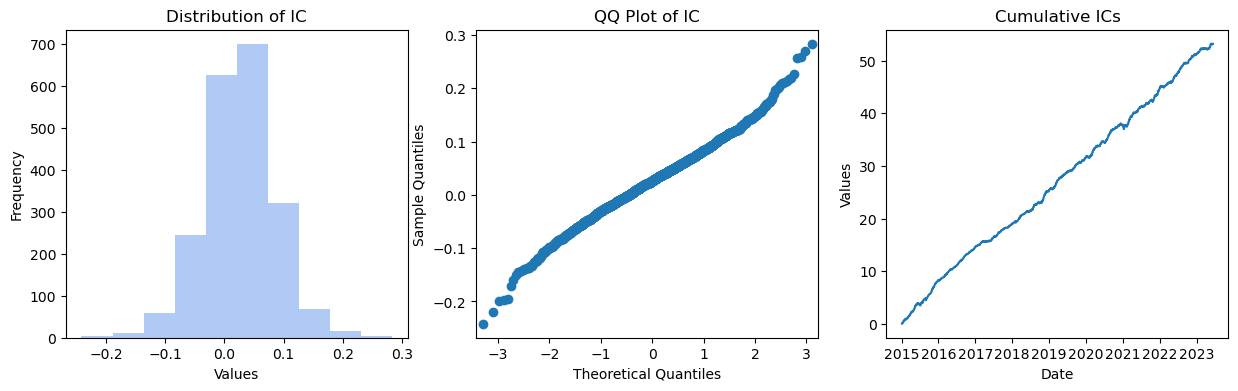

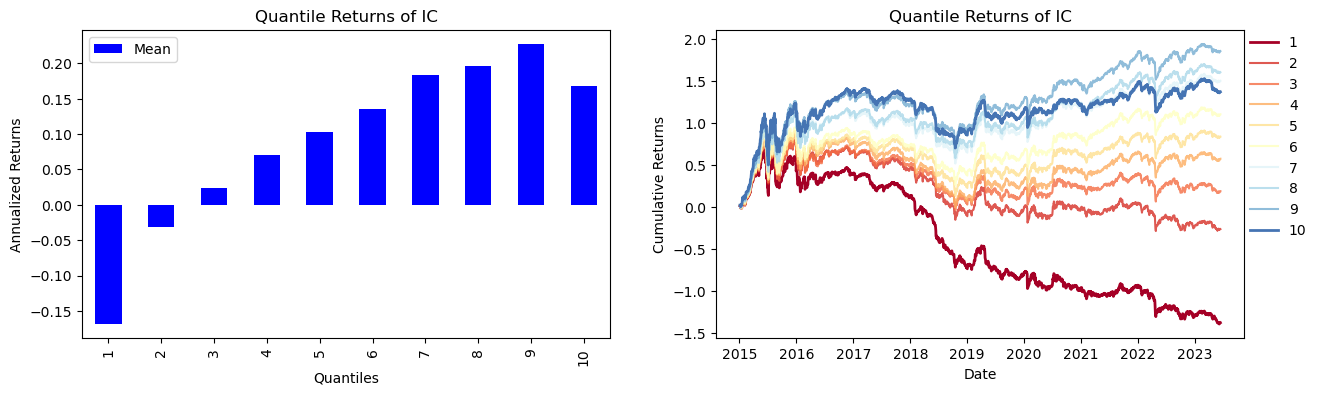

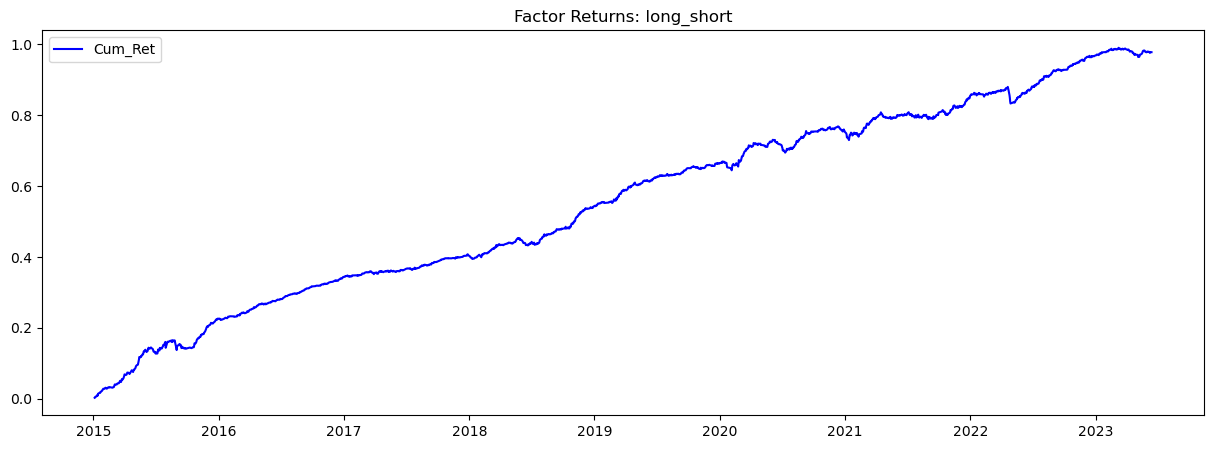

+---------------+-------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+
|               | Mean  | Volatility | Sharpe Ratio | Skewness | Excess Kurtosis | VaR (0.05) | CVaR (0.05) |  Min   |  Max  | Max Drawdown |   Peak   |  Bottom  | Recovery |
+---------------+-------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+
| factor_return | 0.120 |   0.033    |    3.632     |  -0.530  |      6.342      |   -0.003   |   -0.004    | -0.017 | 0.010 |    -0.046    | 20220420 | 20220428 | 20220630 |
+---------------+-------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+


In [16]:
f_standardized = ff.standardize_factor(f)
f2_standardized = ff.standardize_factor(f2)

e_f = ff.compute_daily_residuals_simple(f_standardized,f2_standardized)
ff.evaluate_factor(e_f,num_quantiles=10,factor_ret_method="long_short")